The goal of this notebook is to be able to load the data and get it into a form that is suitable for further analysis. After I develop a good pipeline, I might consolidate the functional code into a Python script.

In [1]:
# pip install mne

In [2]:
import mne
from pathlib import Path

data_path = Path("../data/raw/P1-20251027T182958Z-1-001/P1/")

file_path = data_path / "binepochs filtered ICArej P1AvgBOS2.set"

print(file_path.exists())

True


In [3]:
epochs = mne.io.read_epochs_eeglab(file_path)
print(epochs)

Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS2.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
<EpochsEEGLAB | 120 events (all good), -0.5 – 2.998 s (baseline off), ~52.5 MiB, data loaded,
 'B7(audio1)/B1(tactile1)': 10
 'B1(tactile1)/B7(audio1)': 9
 'B1(tactile1)/B8(audio2)': 1
 'B8(audio2)/B2(tactile2)': 10
 'B2(tactile2)/B8(audio2)': 9
 'B2(tactile2)/B9(audio3)': 1
 'B9(audio3)/B3(tactile3)': 10
 'B3(tactile3)/B9(audio3)': 9
 'B3(tactile3)/B10(audio4)': 1
 'B10(audio4)/B4(tactile4)': 10
 and 8 more events ...>


C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\3952745813.py:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(file_path)


In [4]:
print(epochs.event_id)
print(epochs.events[:10])

{'B7(audio1)/B1(tactile1)': 1, 'B1(tactile1)/B7(audio1)': 2, 'B1(tactile1)/B8(audio2)': 3, 'B8(audio2)/B2(tactile2)': 4, 'B2(tactile2)/B8(audio2)': 5, 'B2(tactile2)/B9(audio3)': 6, 'B9(audio3)/B3(tactile3)': 7, 'B3(tactile3)/B9(audio3)': 8, 'B3(tactile3)/B10(audio4)': 9, 'B10(audio4)/B4(tactile4)': 10, 'B4(tactile4)/B10(audio4)': 11, 'B4(tactile4)/B11(audio5)': 12, 'B11(audio5)/B5(tactile5)': 13, 'B5(tactile5)/B11(audio5)': 14, 'B5(tactile5)/B12(audio6)': 15, 'B12(audio6)/B6(tactile6)': 16, 'B6(tactile6)/B12(audio6)': 17, 'B6(tactile6)': 18}
[[  257     0     1]
 [ 2049     0     2]
 [ 3841     0     1]
 [ 5633     0     2]
 [ 7425     0     1]
 [ 9217     0     2]
 [11009     0     1]
 [12801     0     2]
 [14593     0     1]
 [16385     0     2]]


In [5]:
print(epochs.get_data().shape)

(120, 32, 1792)


In [6]:
# Separate auditory and tactile epochs
import numpy as np

auditory_epochs = epochs[::2]
tactile_epochs = epochs[1::2]

# Alternative method using event IDs
# auditory_epochs = epochs['auditory']
# tactile_epochs = epochs['tactile']

print(len(auditory_epochs), len(tactile_epochs))

60 60


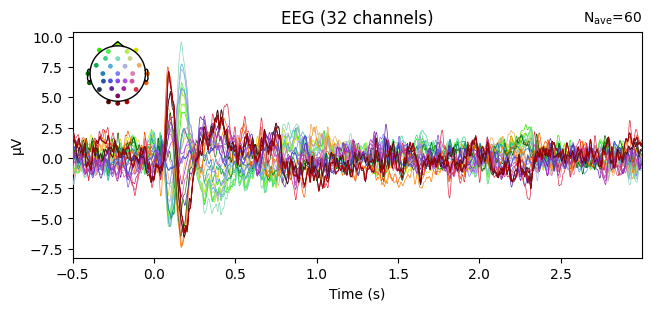

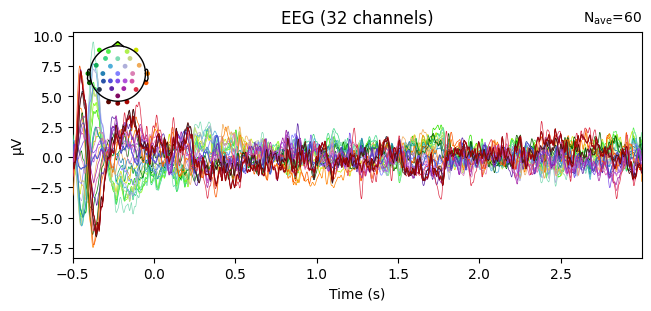

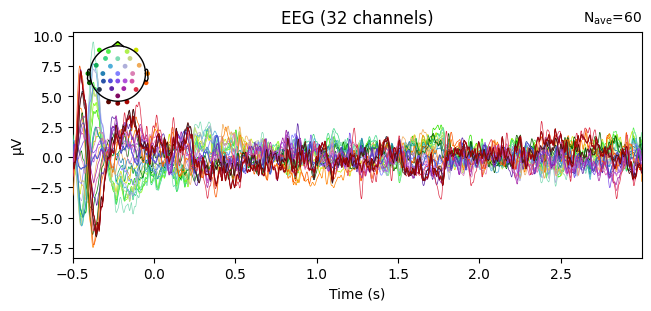

In [7]:
auditory_epochs.average().plot()
tactile_epochs.average().plot()


The average waveforms between the auditory and visual onsets look identical, just shifted by 500 ms (which is completely expected from the experimental setup).

In [8]:
import os
from glob import glob

set_files = sorted(glob(os.path.join(data_path, "*.set")))

all_epochs = []
for file in set_files:
    ep = mne.io.read_epochs_eeglab(file)
    all_epochs.append(ep)

Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS10.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS11.set...


C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)
C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS12.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS13.set...
Not setting metadata


C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)
C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)


120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS15.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS16.set...


C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)
C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS17.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS2.set...
Not setting metadata


C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)
C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)


120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS3.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS5.set...
Not setting metadata


C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)
C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)


120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS6.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS7.set...


C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)
C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS8.set...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Rinta\Documents\Classes\PSYC 4745\Research Project\CISI Repo\Phys-Cog-CISI-Group\notebooks\..\data\raw\P1-20251027T182958Z-1-001\P1\binepochs filtered ICArej P1AvgBOS9.set...
Not setting metadata


C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)
C:\Users\Rinta\AppData\Local\Temp\ipykernel_22868\4015773531.py:8: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  ep = mne.io.read_epochs_eeglab(file)


120 matching events found
No baseline correction applied
0 projection items activated
Ready.


Identifying common channels ...


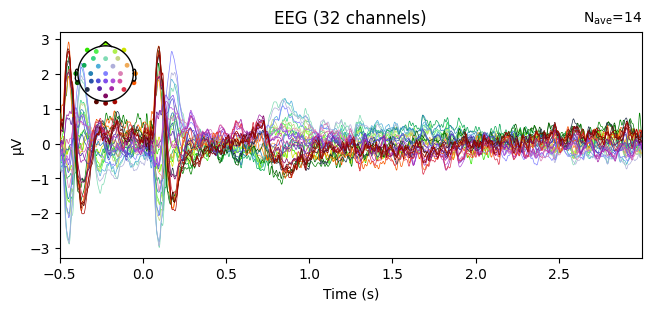

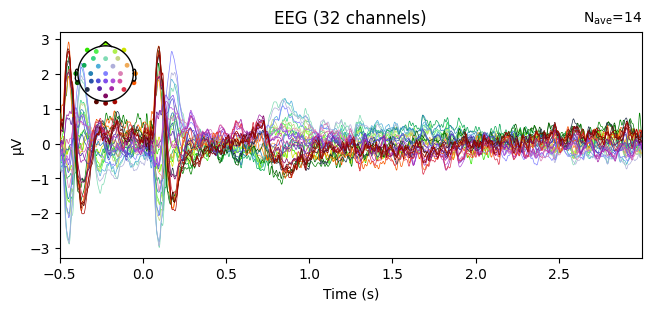

In [9]:
grand_average = mne.grand_average([ep.average() for ep in all_epochs])
grand_average.plot()

In [10]:
epochs.tmin, epochs.tmax

(np.float64(-0.5), np.float64(2.998046875))

Using matplotlib as 2D backend.


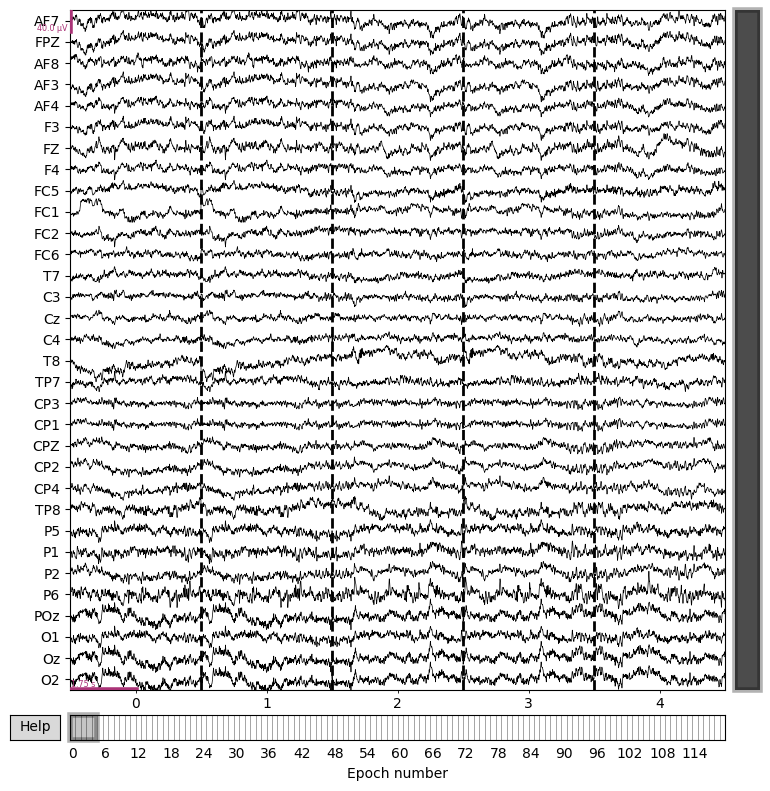

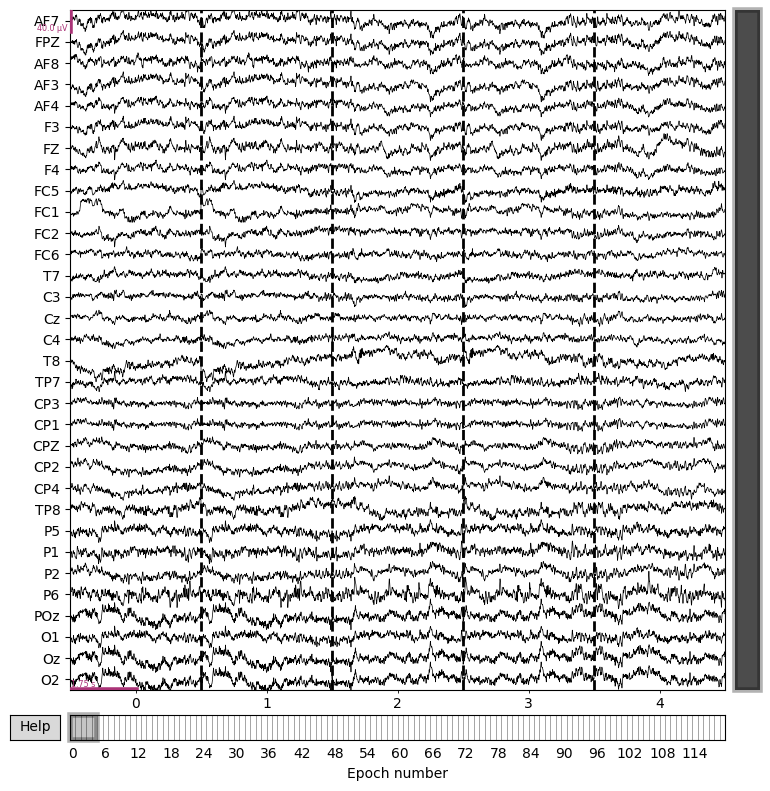

In [11]:
epochs.plot(n_epochs=5, n_channels=32)